# GRIP : THE SPARK FOUNDATION

###Data Science & Business Analytics Intern January 2023 Batch(#GRIPJan2023)


#Name: RESHINA.E.N

##Task 4: Exploratory Data Analysis - Terrorism

Problem statement:As a security/defense analyst, try to find out the hot zone of terrorism.
● What all security issues and insights you can derive by EDA?

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns

import statsmodels.api as sm
from scipy import stats


from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#Display propertice
pd.set_option('max_columns', 135)
pd.set_option('max_rows',135)

In [2]:
# load the dataset
df= pd.read_csv(r"C:\Users\binu-\OneDrive\Desktop\Spark Foundation January2023\global_terrorism.csv",encoding = "ISO-8859-1")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [3]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
df.shape

(181691, 135)

In [5]:
df.dtypes#data type of each column

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype

In [6]:
df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

Percentage of missing values

In [7]:
missing_values = df.isnull().sum() / len(df)        # the missing percentage sorted before we apply cleaning methods  
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values


doubtterr             0.000006
multiple              0.000006
specificity           0.000033
ishostkid             0.000980
guncertain1           0.002091
provstate             0.002317
city                  0.002389
target1               0.003500
natlty1               0.008581
natlty1_txt           0.008581
latitude              0.025076
longitude             0.025081
nkill                 0.056761
targsubtype1_txt      0.057091
targsubtype1          0.057091
nwound                0.089773
weapsubtype1          0.114304
weapsubtype1_txt      0.114304
corp1                 0.234189
nkillus               0.354701
nwoundus              0.356110
claimed               0.363915
summary               0.363964
scite1                0.364305
nkillter              0.368527
weapdetail            0.372446
nwoundte              0.380553
nperpcap              0.382457
nperps                0.391406
ransom                0.574107
scite2                0.576572
propextent_txt        0.647396
propexte

In [8]:
df.isnull().any()

eventid               False
iyear                 False
imonth                False
iday                  False
approxdate             True
extended              False
resolution             True
country               False
country_txt           False
region                False
region_txt            False
provstate              True
city                   True
latitude               True
longitude              True
specificity            True
vicinity              False
location               True
summary                True
crit1                 False
crit2                 False
crit3                 False
doubtterr              True
alternative            True
alternative_txt        True
multiple               True
success               False
suicide               False
attacktype1           False
attacktype1_txt       False
attacktype2            True
attacktype2_txt        True
attacktype3            True
attacktype3_txt        True
targtype1             False
targtype1_txt       

Dropping of the columns that have more than fifty percentage data as NAN values

In [9]:
#drop columns that have  more than 50% data as null
cols_to_delete = df.columns[df.isnull().sum()/len(df) > .50]
print(cols_to_delete)
df=df.drop(cols_to_delete, axis=1)

pd.set_option("display.max_columns", None) # display all columns
df.head(5)

Index(['approxdate', 'resolution', 'location', 'alternative',
       'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3',
       'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2',
       'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2',
       'guncertain3', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim',
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
       'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt',
       'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'nhostkid',
       'nhostkidus', 'nhours', 'ndays', 'divert'

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


Identifying and removing duplicate columns

In [10]:
def getDuplicateColumns(df):
    duplicateColumnNames=set()
    for x in range (df.shape[1]):
        col=df.iloc[:, x]
        for y in range (x+1, df.shape[1]):
            otherCol=df.iloc[:,y]
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                
    return list (duplicateColumnNames)

duplicateColumnNames = getDuplicateColumns(df)
for col in duplicateColumnNames:
    print('Column name : ', col)


In [11]:
df.describe().columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'region',
       'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weapsubtype1', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'ishostkid', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [12]:
df.shape

(181691, 58)

In [13]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

The Heat map shows the correlation between the variables

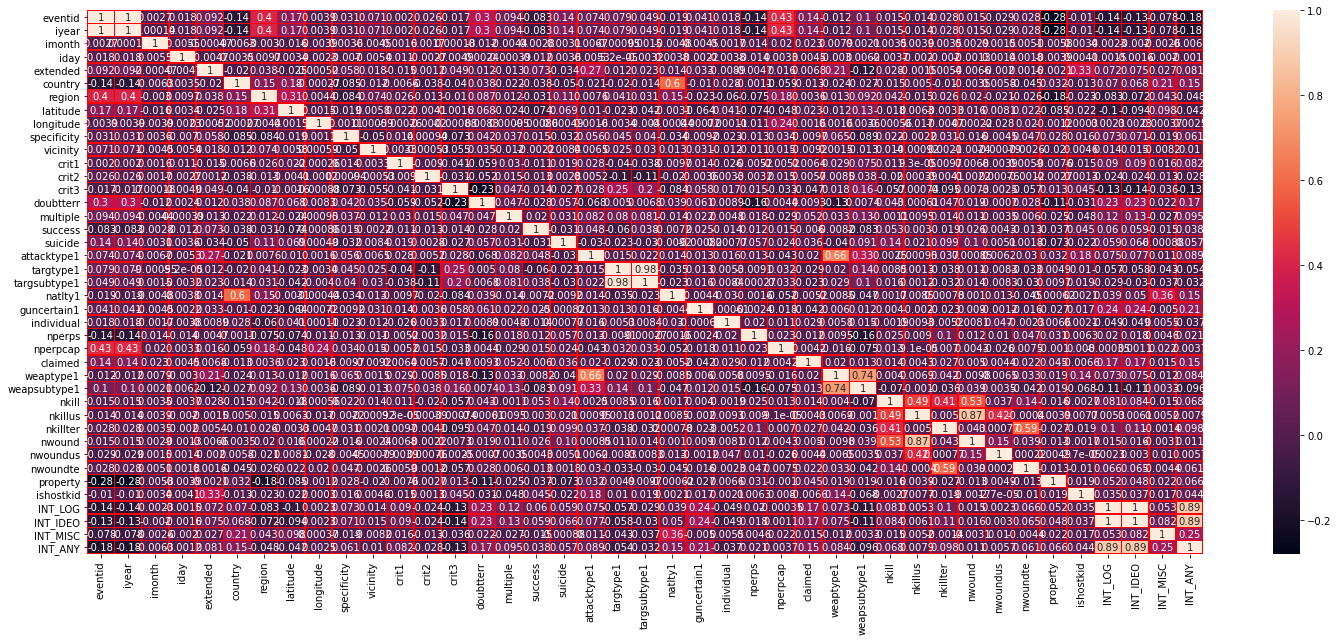

In [14]:
# Plotting the Heatmap of the columns using correlation matrix
corr = df.corr()
plt.figure(figsize = (25,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="red")

plt.show()


Changing column names

In [15]:
df.rename(columns = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','provstate':'State','attacktype1_txt':'Attack','targtype1':'Target','targtype1_txt':'target_type','targsubtype1':'targetsub','weaptype1_txt':'Weapon_type','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group_name'},inplace = True)

In [16]:
#Taking important variables 
df = df[['Year','Month','Day','Country','Region','State','city','latitude','longitude','Attack','Target','target_type','Weapon_type','Killed','Wounded','Summary','Group_name']]

In [17]:
df.head()

,Year,Month,Day,Country,Region,State,city,latitude,longitude,Attack,Target,target_type,Weapon_type,Killed,Wounded,Summary,Group_name
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,14,Private Citizens & Property,Unknown,1.0,0.0,NaN,MANO-D
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),7,Government (Diplomatic),Unknown,0.0,0.0,NaN,23rd of September Communist League
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,10,Journalists & Media,Unknown,1.0,0.0,NaN,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,7,Government (Diplomatic),Explosives,NaN,NaN,NaN,Unknown
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,7,Government (Diplomatic),Incendiary,NaN,NaN,NaN,Unknown


In [18]:
df.shape

(181691, 17)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   State        181270 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   Attack       181691 non-null  object 
 10  Target       181691 non-null  int64  
 11  target_type  181691 non-null  object 
 12  Weapon_type  181691 non-null  object 
 13  Killed       171378 non-null  float64
 14  Wounded      165380 non-null  float64
 15  Summary      115562 non-null  object 
 16  Group_name   181691 non-null  object 
dtypes: float64(4), int64(4), object(9)
memory usage: 23.6+ MB


In [20]:
df.describe()

,Year,Month,Day,latitude,longitude,Target,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,8.439719,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,6.653838,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,3.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,4.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,14.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,22.000000,1570.000000,8191.000000


In [21]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
State            421
city             434
latitude        4556
longitude       4557
Attack             0
Target             0
target_type        0
Weapon_type        0
Killed         10313
Wounded        16311
Summary        66129
Group_name         0
dtype: int64

<AxesSubplot:>

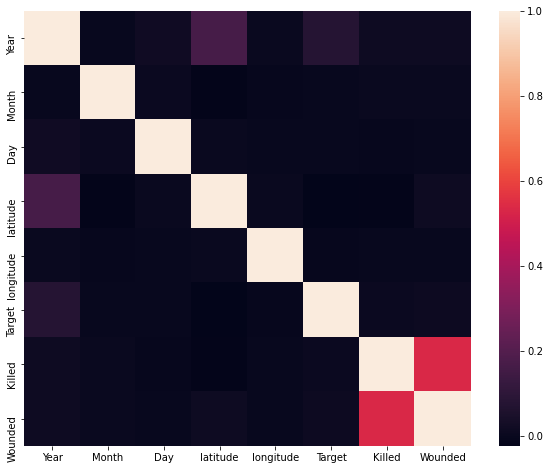

In [22]:
cor = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor)

# Data Visualisation

Yearly Attack

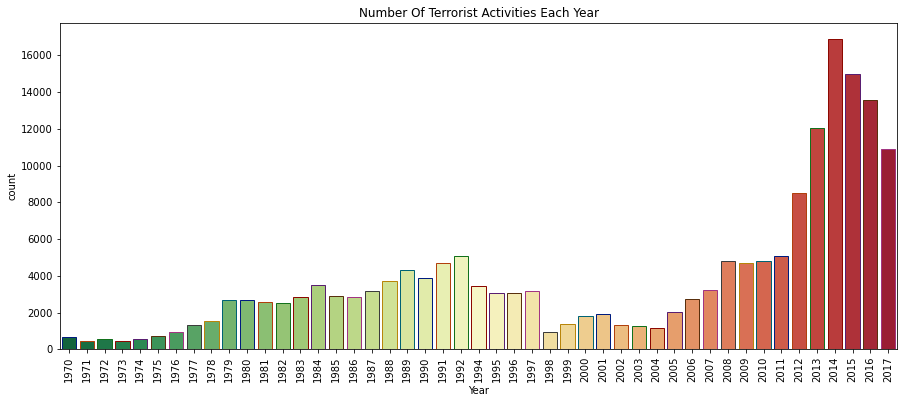

In [23]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

The above figure shows that highest terrorist attack happened in the year 2014

Attack by each Country

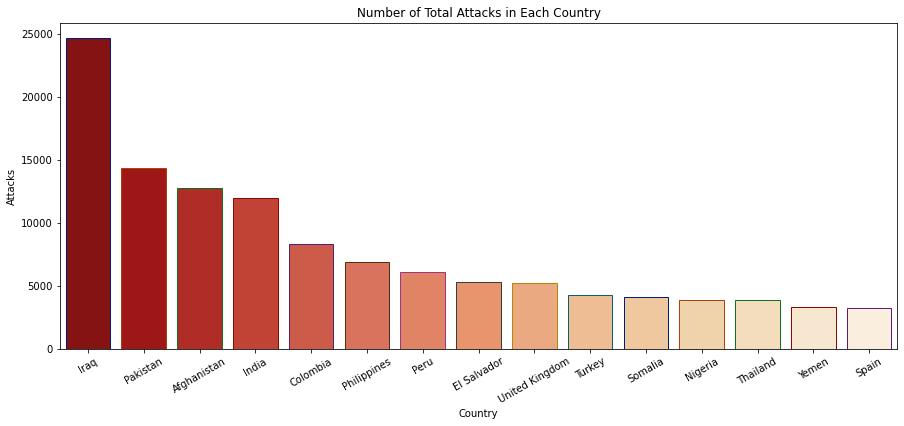

In [24]:
plt.subplots(figsize=(15,6))
country_attacks = df.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Attacks'], palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number of Total Attacks in Each Country')
plt.show()

The above figure shows Iraq is the highest terrorist attack country.

Attack according to Region

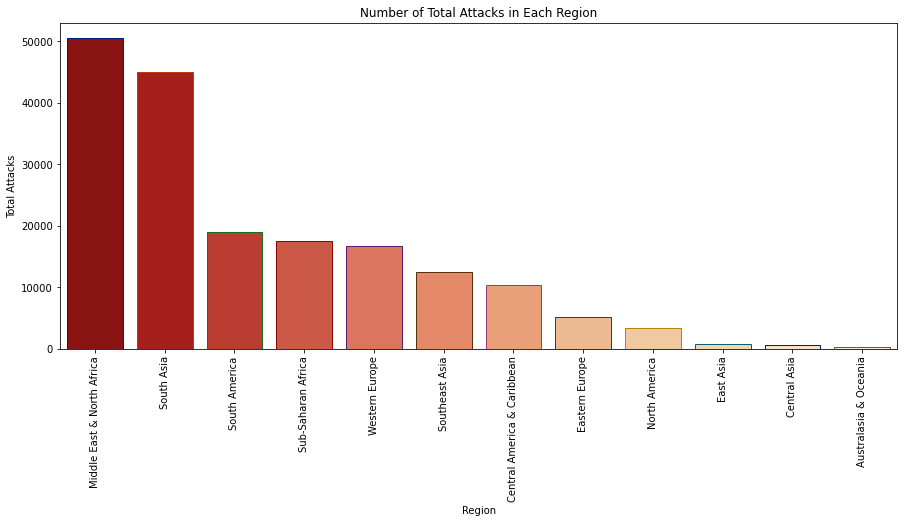

In [25]:
region_attacks = df.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'], palette='OrRd_r', edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number of Total Attacks in Each Region')
plt.show()

The figure above shows the highest regional wise attack was on Middle East and North Africa

Attacking Methods- below figure shows terrorists used bombing/explosion highest.

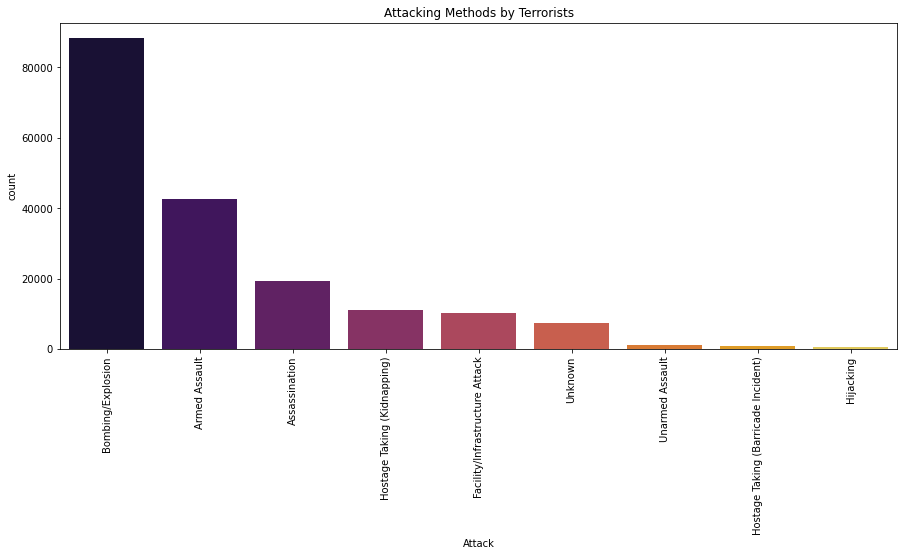

In [28]:
plt.subplots(figsize=(15,6))
sns.countplot('Attack',data=df,palette='inferno',order=df['Attack'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

The below figure shows the terrorist attacks mainly private citizens and property

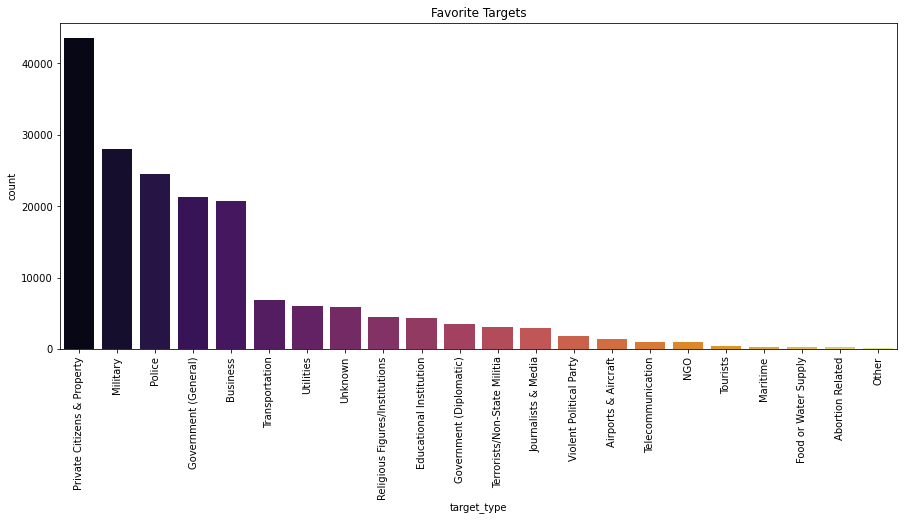

In [30]:
plt.subplots(figsize=(15,6))
sns.countplot(df['target_type'],palette='inferno',order=df['target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

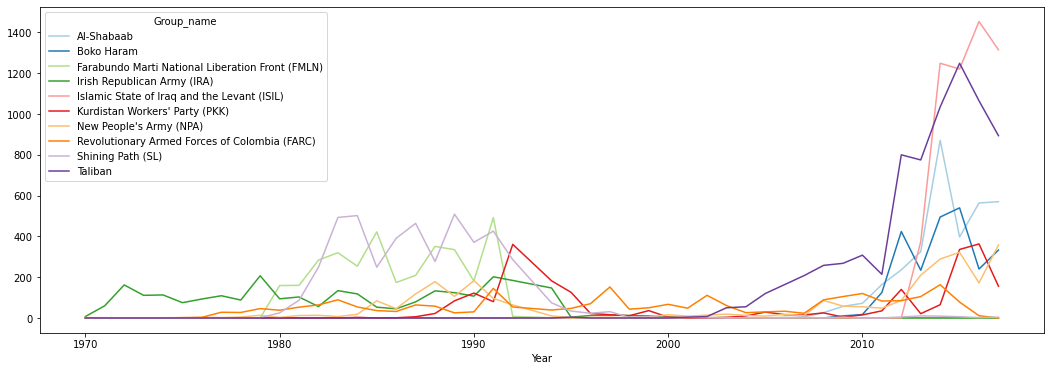

In [32]:
Top_groups10=df[df['Group_name'].isin(df['Group_name'].value_counts()[1:11].index)]
pd.crosstab(Top_groups10.Year,Top_groups10.Group_name).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

The IRA group started in the early 1970 and ended by the middle of 1990-2000. The Taliban and the ISIL started in the late 2000.